In [1]:
# tensorflow & keras
from __future__ import absolute_import, division, print_function, unicode_literals
import tensorflow as tf
from tensorflow import keras
from keras.layers import Dense,MaxPooling2D,AveragePooling2D
from keras.applications import MobileNetV2
from keras.preprocessing import image
from keras.applications.mobilenet import preprocess_input
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Model
from keras.optimizers import Adam,SGD,Adagrad,RMSprop

#keperluan plot
import matplotlib.pyplot as plt
%matplotlib inline
from PIL import Image

#Explore data & Directory
import pandas as pd
import numpy as np
import os
import shutil
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

Using TensorFlow backend.


In [2]:
import tensorflow as tf
print(tf.__version__)

2.0.0


In [3]:
source = '/images'

In [4]:
# Membuat directory atau folder pemisah gambar
os.makedirs('data/train/mono')
os.makedirs('data/train/poly')

os.makedirs('data/test/mono')
os.makedirs('data/test/poly')

os.makedirs('data/val/mono')
os.makedirs('data/val/poly')

FileExistsError: [WinError 183] Cannot create a file when that file already exists: 'data/train/mono'

In [9]:
mono_dir = os.listdir('data/mono')
mono_poly = os.listdir('data/poly')

In [20]:
data_dir = os.listdir('images')
mono, poly = train_test_split(data_dir, test_size=0.2, random_state=1) 
for f in data_dir:
    print('images/'+f)

images/cell0001.png
images/cell0002.png
images/cell0003.png
images/cell0004.png
images/cell0005.png
images/cell0006.png
images/cell0007.png
images/cell0008.png
images/cell0009.png
images/cell0010.png
images/cell0011.png
images/cell0012.png
images/cell0013.png
images/cell0014.png
images/cell0015.png
images/cell0016.png
images/cell0017.png
images/cell0018.png
images/cell0019.png
images/cell0020.png
images/cell0021.png
images/cell0022.png
images/cell0023.png
images/cell0024.png
images/cell0025.png
images/cell0026.png
images/cell0027.png
images/cell0028.png
images/cell0029.png
images/cell0030.png
images/cell0031.png
images/cell0032.png
images/cell0033.png
images/cell0034.png
images/cell0035.png
images/cell0036.png
images/cell0037.png
images/cell0038.png
images/cell0039.png
images/cell0040.png
images/cell0041.png
images/cell0042.png
images/cell0043.png
images/cell0044.png
images/cell0045.png
images/cell0046.png
images/cell0047.png
images/cell0048.png
images/cell0049.png
images/cell0050.png


images/cell2368.png
images/cell2369.png
images/cell2370.png
images/cell2371.png
images/cell2372.png
images/cell2373.png
images/cell2374.png
images/cell2375.png
images/cell2376.png
images/cell2377.png
images/cell2378.png
images/cell2379.png
images/cell2380.png
images/cell2381.png
images/cell2382.png
images/cell2383.png
images/cell2384.png
images/cell2385.png
images/cell2386.png
images/cell2387.png
images/cell2388.png
images/cell2389.png
images/cell2390.png
images/cell2391.png
images/cell2392.png
images/cell2393.png
images/cell2394.png
images/cell2395.png
images/cell2396.png
images/cell2397.png
images/cell2398.png
images/cell2399.png
images/cell2400.png
images/cell2401.png
images/cell2402.png
images/cell2403.png
images/cell2404.png
images/cell2405.png
images/cell2406.png
images/cell2407.png
images/cell2408.png
images/cell2409.png
images/cell2410.png
images/cell2411.png
images/cell2412.png
images/cell2413.png
images/cell2414.png
images/cell2415.png
images/cell2416.png
images/cell2417.png


In [23]:
mono = data_
poly = data_dir[61:]


In [49]:
label = pd.read_excel('labels - Copy.xlsx')
label.head()

,path probability type
0,images/cell0001.png 1.0 mono
1,images/cell0002.png 1.0 mono
2,images/cell0003.png 1.0 mono
3,images/cell0004.png 0.0 mono
4,images/cell0005.png 1.0 mono


In [10]:
mono_dir=os.listdir('data/mono')
poly_dir=os.listdir('data/poly')

In [6]:
for f in mono:
    shutil.move('images/'+f, 'data/mono')
for f in poly:
    shutil.move('images/'+f, 'data/poly')

NameError: name 'mono' is not defined

In [11]:
mono_train,mono_test = train_test_split(mono_dir, test_size=0.2, random_state=1)
mono_test, mono_val = train_test_split(mono_test, test_size=0.5, random_state=1)

poly_train, poly_test = train_test_split(poly_dir, test_size=0.2, random_state=1)
poly_test, poly_val = train_test_split(poly_test, test_size=0.5, random_state=1)

In [12]:
print('Ukuran Data Untuk Proses Training')
print('')
print("mono training data: " + str(len(mono_train)))
print("poly training data: "+ str(len(poly_train)))
print('')
print("mono validation data: "+ str(len(mono_val)))
print("poly validation data: "+str(len(poly_val)))
print('')
print("mono test data: "+str(len(mono_test)))
print("poly test data: "+str(len(poly_test)))

Ukuran Data Untuk Proses Training

mono training data: 192
poly training data: 240

mono validation data: 24
poly validation data: 30

mono test data: 24
poly test data: 30


In [15]:
#train
for f in mono_train:
  shutil.move('data/mono/'+f, 'data/train/mono')
for f in poly_train:
  shutil.move('data/poly/'+f, 'data/train/poly')

In [16]:
#test
for f in mono_test:
  shutil.move('data/mono/'+f, 'data/test/mono')
for f in poly_test:
  shutil.move('data/poly/'+f, 'data/test/poly')

In [17]:
#validation
for f in mono_val:
  shutil.move('data/mono/'+f, 'data/val/mono')
for f in poly_val:
  shutil.move('data/poly/'+f, 'data/val/poly')

In [18]:
image_size = 224 # Semua gambar diubah kedalam 224 *224
batch_size = 32

# ubah semua kode gambar dari 0-255 menjadi 0-1 (berfungsi untuk standarisasi dari data)
train_datagen = keras.preprocessing.image.ImageDataGenerator(
                rescale=1./255)
                # featurewise_center=True,
                # featurewise_std_normalization=True,
                # rotation_range=20,
                # width_shift_range=0.2,
                # height_shift_range=0.2,
                # horizontal_flip=True)

validation_datagen = keras.preprocessing.image.ImageDataGenerator(rescale=1./255)

test_datagen = keras.preprocessing.image.ImageDataGenerator(
                rescale=1./255)


In [19]:
train_dir = os.path.join('data/train')
val_dir = os.path.join('data/val')
test_dir = os.path.join('data/test')


In [20]:
train_generator = train_datagen.flow_from_directory(
                train_dir,  
                target_size=(image_size, image_size),
                batch_size=batch_size,
                class_mode='binary')

Found 432 images belonging to 2 classes.


In [28]:

# Generate data gambar menjadi array

train_generator = train_datagen.flow_from_directory(
                train_dir,  
                target_size=(image_size, image_size),
                batch_size=batch_size,
                class_mode='binary')

validation_generator = validation_datagen.flow_from_directory(
                val_dir, 
                target_size=(image_size, image_size),
                batch_size=batch_size,
                class_mode='binary')


test_generator = test_datagen.flow_from_directory(
                test_dir, 
                target_size=(image_size, image_size),
                batch_size=batch_size,
                shuffle=False, #mempermudah saat nanti klasifikasi mengunakan sklearn
                class_mode='binary')

Found 432 images belonging to 2 classes.
Found 54 images belonging to 2 classes.
Found 54 images belonging to 2 classes.


In [29]:
len(os.listdir('data/val/mono'))

24

In [22]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), input_shape=(224, 224, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(1024, activation='relu',kernel_regularizer=keras.regularizers.l2(0.001)),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

#Early stopping dibutuhkan ketika epochs mulai konvergen tetapi belum mencapai batas epochs maksimal
callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=10, mode="auto") 

model.summary()

model.compile(loss = 'binary_crossentropy', optimizer='Adam', metrics=['BinaryAccuracy'])

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 222, 222, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 111, 111, 32)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 109, 109, 64)      18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 54, 54, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 52, 52, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 26, 26, 128)       0         
_________________________________________________________________
flatten (Flatten)            (None, 86528)             0

In [30]:
#Plot model
keras.utils.plot_model(model, "arsitektur_model.png", show_shapes=True)

Failed to import pydot. You must install pydot and graphviz for `pydotprint` to work.


In [31]:
import pydot

In [32]:
import graphviz

In [33]:
epochs = 10
steps_per_epoch = train_generator.n // batch_size
validation_steps = validation_generator.n // batch_size

history = model.fit_generator(train_generator,
                              steps_per_epoch = steps_per_epoch,validation_data=validation_generator,
                              epochs=epochs,shuffle=False)

Epoch 1/10
13/13 [==============================] - 30s 2s/step - loss: 7.4801 - BinaryAccuracy: 0.5505 - val_loss: 7.2879 - val_BinaryAccuracy: 0.5556
Epoch 2/10
13/13 [==============================] - 25s 2s/step - loss: 7.5429 - BinaryAccuracy: 0.5500 - val_loss: 7.4756 - val_BinaryAccuracy: 0.5556
Epoch 3/10
13/13 [==============================] - 26s 2s/step - loss: 6.9627 - BinaryAccuracy: 0.5625 - val_loss: 7.1723 - val_BinaryAccuracy: 0.5556
Epoch 4/10
13/13 [==============================] - 26s 2s/step - loss: 7.1759 - BinaryAccuracy: 0.5400 - val_loss: 6.8495 - val_BinaryAccuracy: 0.5556
Epoch 5/10
13/13 [==============================] - 25s 2s/step - loss: 6.7683 - BinaryAccuracy: 0.5600 - val_loss: 6.9048 - val_BinaryAccuracy: 0.5556
Epoch 6/10
13/13 [==============================] - 25s 2s/step - loss: 6.5038 - BinaryAccuracy: 0.5775 - val_loss: 6.5502 - val_BinaryAccuracy: 0.5556
Epoch 7/10
13/13 [==============================] - 25s 2s/step - loss: 7.4408 - BinaryA

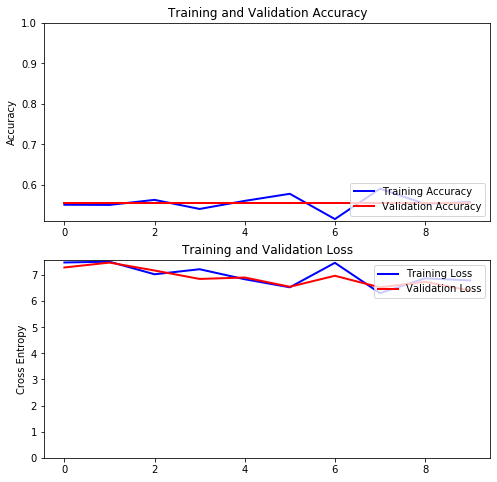

In [34]:
acc = history.history['BinaryAccuracy']
val_acc =history.history['val_BinaryAccuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(acc, label='Training Accuracy',color='b', linewidth= 2)
plt.plot(val_acc, label='Validation Accuracy',color='r', linewidth= 2)
plt.legend(loc='lower right')
plt.ylabel('Accuracy')
plt.ylim([min(plt.ylim()),1])
plt.title('Training and Validation Accuracy')

plt.subplot(2, 1, 2)
plt.plot(loss, label='Training Loss',color='b', linewidth= 2)
plt.plot(val_loss, label='Validation Loss',color='r', linewidth= 2)
plt.legend(loc='upper right')
plt.ylabel('Cross Entropy')
plt.ylim([0,max(plt.ylim())])
plt.title('Training and Validation Loss')
plt.show()

In [35]:
#Test data
model.evaluate(test_generator)
pred=model.predict_classes(test_generator,batch_size=None)
y_pred=np.array([0]*70+[1]*64)

2/2 [==============================] - 1s 539ms/step - loss: 11.6127 - BinaryAccuracy: 0.5556


In [41]:
len()

134

In [105]:
# Confusion Matrix
target_names = ['mono','poly']
print(classification_report(y_pred,pred, target_names=target_names))

ValueError: Found input variables with inconsistent numbers of samples: [134, 12]

In [106]:
# Klasifikasi data test
def plot_confusion_matrix(y_true, y_pred, classes,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'

    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    # Only use the labels that appear in the data
    classes = classes[:2]
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return ax


np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plot_confusion_matrix(y_pred, pred, classes=['sunflowers','roses'],
                      title='Confusion matrix')

plt.show()

ValueError: Found input variables with inconsistent numbers of samples: [134, 12]

In [36]:
test = 'data/poly/cell0061.png'

In [37]:
test

'data/poly/cell0061.png'

In [38]:
# predicting images
path = test
img = image.load_img(path, target_size=(224, 224))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)

images = np.vstack([x])
classes = model.predict(images, batch_size=32)
print(test)
print(classes)

FileNotFoundError: [Errno 2] No such file or directory: 'data/poly/cell0061.png'

In [39]:
# Create a converter
converter = tf.lite.TFLiteConverter.from_keras_model(model)
# Convert the model
tflite_model = converter.convert()
# Create the tflite model file
tflite_model_name = "mymodel1.tflite"
open(tflite_model_name, "wb").write(tflite_model)

354802816